In [1]:
import numpy as np
%cd "FitbitWebAPI"

[Errno 2] No such file or directory: 'FitbitWebAPI'
/mnt/disks/sdb/home2/tetsu.sato/FitbitWebAPI


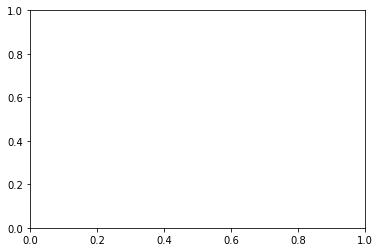

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


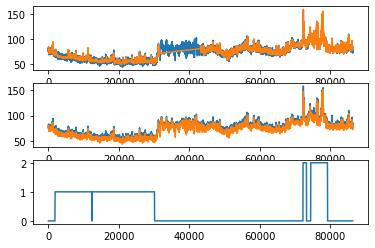

In [6]:
rawpf=np.load("heartrate-pf-2022-06-06.npy").reshape(86334 , 2)
raw=np.load("heartrate-pd-2022-06-06.npy").T
pf=np.load("heartrate-sampled-pf-2022-06-06.npy").T
state=np.load("heartrate-sampledstate-pf-2022-06-06.npy").T
fig = plt.figure()
ax0 = fig.add_subplot(3, 1, 1)
ax0.plot(rawpf[:, 0], rawpf[:, 1])
ax0.plot(raw[:, 0], raw[:, 1])
ax1 = fig.add_subplot(3, 1, 2)
ax1.plot(pf[:, 0], pf[:, 1])
ax1.plot(pf[:, 0], pf[:, 2])
ax2 = fig.add_subplot(3, 1, 3)
ax2.plot(state[:, 0], state[:, 1])

In [11]:
print(rawpf.shape)
print(raw.shape)
print(15485/86400)

(86334, 2)
(15485, 3)
0.17922453703703703


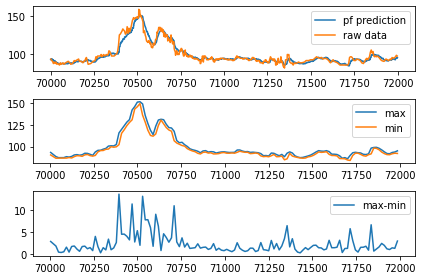

In [86]:
start=70000
end=72000
fig = plt.figure()
#ax0 = fig.add_subplot(3, 1, 1)
ax0 = fig.add_subplot(3, 1, 1)
ax0.plot(rawpf[start:end, 0], rawpf[start:end, 1], label="pf prediction")
#for i in range(raw.shape[0]):  
#    if raw[i, 0] >= rawpf[start, 0] and raw[i, 0] < rawpf[end, 0]:
#        ax0.plot(raw[i, 0], raw[i, 1], "ro")
        #print("plot", raw[i, 0], raw[i, 1])
raw_slice = raw[(raw[:, 0] >= rawpf[start, 0])&(raw[:, 0] < rawpf[end, 0])]
ax0.plot(raw_slice[:, 0], raw_slice[:, 1], label="raw data")
ax0.legend()
#ax1 = fig.add_subplot(3, 1, 2)
ax1 = fig.add_subplot(3, 1, 2)
#for i in range(pf.shape[0]):
#    if pf[i, 0] >= rawpf[start, 0] and pf[i, 0] < rawpf[end, 0]:
#        ax1.plot(pf[i, 0], pf[i, 1], "ro")
#        ax1.plot(pf[i, 0], pf[i, 2], "ro")
#ax1.plot(pf[start:end, 0], pf[start:end, 1])
#ax1.plot(pf[start:end, 0], pf[start:end, 2])
pf_slice = pf[(pf[:, 0] >= rawpf[start, 0])&(pf[:, 0] < rawpf[end, 0])]
#print(pf_slice)
ax1.plot(pf_slice[:, 0], pf_slice[:, 1], label="max")
ax1.plot(pf_slice[:, 0], pf_slice[:, 2], label="min")
ax1.legend()
maxmin=pf_slice[:, 1]-pf_slice[:, 2]
ax2 = fig.add_subplot(3, 1, 3)
ax2.plot(pf_slice[:, 0], maxmin, label="max-min")
#ax2 = fig.add_subplot(3, 1, 3)
#ax2.plot(state[start:end, 0], state[start:end, 1]) 
ax2.legend()
fig.tight_layout()

### 論文用に，5日分の睡眠データ・運動データを重ねたグラフが欲しい
- まずデータ処理に使うサンプリング後データ

heartrate-sampled-pf-2022-06-06.npy
heartrate-sampled-sleep-2022-06-06.npy
heartrate-sampled-active-2022-06-06.npy
heartrate-sampled-pf-2022-06-07.npy
heartrate-sampled-sleep-2022-06-07.npy
heartrate-sampled-active-2022-06-07.npy
heartrate-sampled-pf-2022-06-08.npy
heartrate-sampled-sleep-2022-06-08.npy
heartrate-sampled-active-2022-06-08.npy
heartrate-sampled-pf-2022-06-09.npy
heartrate-sampled-sleep-2022-06-09.npy
heartrate-sampled-active-2022-06-09.npy
heartrate-sampled-pf-2022-06-10.npy
heartrate-sampled-sleep-2022-06-10.npy
heartrate-sampled-active-2022-06-10.npy


(0, 4)

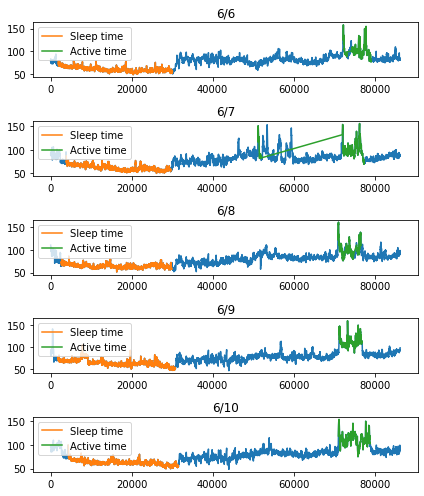

In [155]:
import os
start=6
duration=5
interval = range(start, start + duration)
sleeppcs = np.empty((0, 4))
index = 0
fig = plt.figure(figsize=(6, 7))
for i in interval:
    filename = "heartrate-sampled-pf-2022-06-{:02d}.npy".format(i)
    print(filename)
    if os.path.exists(filename):
        ordpc=np.load(filename).T
    filename = "heartrate-sampled-sleep-2022-06-{:02d}.npy".format(i)
    print(filename)
    if os.path.exists(filename):
        sleeppc=np.load(filename).T
    filename = "heartrate-sampled-active-2022-06-{:02d}.npy".format(i)
    print(filename)
    if os.path.exists(filename):
        activepc=np.load(filename).T
    ax=fig.add_subplot(duration, 1, index+1)
    ax.plot(ordpc[:, 0], ordpc[:, 1])
    ax.plot(sleeppc[:, 0], sleeppc[:, 1], label="Sleep time")
    ax.plot(activepc[:, 0], activepc[:, 1], label="Active time")
    ax.legend()
    ax.set_title("6/{}".format(i))
    index += 1
fig.tight_layout()
sleeppcs.shape

- 次，一応，生データ

heartrate-pd-2022-06-06.npy
heartrate-pd-2022-06-07.npy
heartrate-pd-2022-06-08.npy
heartrate-pd-2022-06-09.npy
heartrate-pd-2022-06-10.npy


(0, 4)

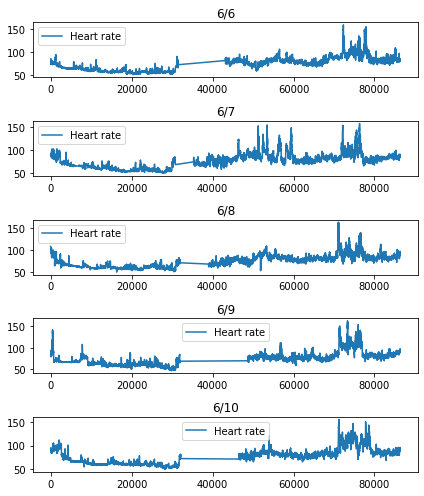

In [158]:
import os
start=6
duration=5
interval = range(start, start + duration)
sleeppcs = np.empty((0, 4))
index = 0
fig = plt.figure(figsize=(6, 7))
for i in interval:
    filename = "heartrate-pd-2022-06-{:02d}.npy".format(i)
    print(filename)
    if os.path.exists(filename):
        rawpc=np.load(filename).T

    ax=fig.add_subplot(duration, 1, index+1)
    ax.plot(rawpc[:, 0], rawpc[:, 1], label="Heart rate")

    ax.legend()
    ax.set_title("6/{}".format(i))
    index += 1
fig.tight_layout()
sleeppcs.shape

In [53]:
rawpf[start, 0]

50000.0

In [63]:
pf[(pf[:, 0] > 50000)&(pf[:,0]<50200)]

array([[50010.        ,    76.12746616,    73.36280744],
       [50025.        ,    75.93591957,    74.41602912],
       [50040.        ,    74.5061338 ,    74.28672051],
       [50055.        ,    75.62563755,    74.58527963],
       [50070.        ,    75.8078102 ,    75.13328719],
       [50085.        ,    76.16717467,    75.62030248],
       [50100.        ,    76.20221945,    74.43417163],
       [50115.        ,    75.34523792,    74.56628303],
       [50130.        ,    76.10250555,    75.26739502],
       [50145.        ,    76.67774406,    75.08544833],
       [50160.        ,    76.68762095,    75.99120227],
       [50175.        ,    76.36243526,    75.44005448],
       [50190.        ,    78.36948571,    75.88122988]])

In [34]:
rawpf[3000:3010, :]

array([[3000.        ,   63.36808012],
       [3001.        ,   63.52832593],
       [3002.        ,   63.24646489],
       [3003.        ,   63.54462446],
       [3004.        ,   63.92167547],
       [3005.        ,   63.8632169 ],
       [3006.        ,   63.92559879],
       [3007.        ,   63.88493554],
       [3008.        ,   64.04490128],
       [3009.        ,   63.90892132]])

In [36]:
rawpf.shape

(84534, 2)

In [50]:
pf.shape

(5636, 3)

In [20]:
state

array([[9.0000e+00, 3.4000e+01, 4.9000e+01, ..., 1.0697e+04, 1.0712e+04,
        1.0727e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [23]:
state[1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 平滑化しないでダウンサンプリングした例を作りたい
- 欠損値だらけなのはどう処理する？
- ウィンドウ単位で丸めるか

In [87]:
raw.shape

(15218, 3)

In [90]:
raw[0:20,:]

array([[  0.,  68.,   0.],
       [ 15.,  68.,   0.],
       [ 20.,  69.,   0.],
       [ 30.,  68.,   0.],
       [ 35.,  69.,   0.],
       [ 40.,  72.,   0.],
       [ 45.,  71.,   0.],
       [ 50.,  70.,   0.],
       [ 55.,  69.,   0.],
       [ 60.,  70.,   0.],
       [ 75.,  70.,   0.],
       [ 80.,  69.,   0.],
       [ 85.,  70.,   0.],
       [100.,  70.,   0.],
       [105.,  69.,   0.],
       [110.,  70.,   0.],
       [115.,  70.,   0.],
       [130.,  70.,   0.],
       [140.,  71.,   0.],
       [145.,  70.,   0.]])

In [93]:
np.set_printoptions(suppress=True)
raw[-20:-1,:]

array([[84403.,    79.,     0.],
       [84408.,    80.,     0.],
       [84413.,    81.,     0.],
       [84418.,    80.,     0.],
       [84423.,    80.,     0.],
       [84428.,    80.,     0.],
       [84433.,    80.,     0.],
       [84438.,    81.,     0.],
       [84448.,    80.,     0.],
       [84453.,    81.,     0.],
       [84458.,    80.,     0.],
       [84473.,    81.,     0.],
       [84478.,    82.,     0.],
       [84483.,    80.,     0.],
       [84498.,    82.,     0.],
       [84503.,    84.,     0.],
       [84508.,    85.,     0.],
       [84523.,    85.,     0.],
       [84528.,    84.,     0.]])

In [129]:
simplesamples = np.empty((0, 2))
print(simplesamples)
for i in range(0, 60*60*24, 15):
    #print(i,"->", i+15)
    win = raw[(raw[:, 0] >= i) & (raw[:, 0] < i + 15)]
    #print(win.shape[0])
    if win.shape[0]>0:
        sampled = win[:, 1].mean()
        #print(sampled)
        #print(np.array([i, sampled]).reshape(1,2))
        simplesamples = np.append(simplesamples, np.array([i, sampled]).reshape(1,2), axis=0)

[]


In [130]:
simplesamples

array([[    0.        ,    68.        ],
       [   15.        ,    68.5       ],
       [   30.        ,    69.66666667],
       ...,
       [84495.        ,    83.66666667],
       [84510.        ,    85.        ],
       [84525.        ,    83.5       ]])

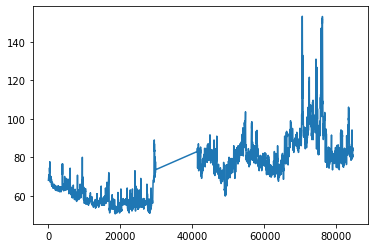

In [131]:
plt.plot(simplesamples[:, 0], simplesamples[:, 1])

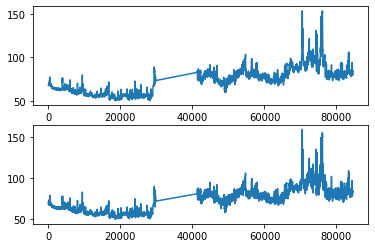

In [133]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1)
ax0.plot(simplesamples[:, 0], simplesamples[:, 1])
ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(raw[:,0], raw[:,1])

- 単純サンプリングの睡眠データとか作れるか

In [135]:
import os
start=6
duration=5
interval = range(start, start + duration)
sleeppcs = np.empty((0, 4))
index = 0
for i in interval:
    filename = "heartrate-sampled-sleep-2022-06-{:02d}.npy".format(i)
    print(filename)
    if os.path.exists(filename):
        sleeppc=np.load(filename).T
        z = np.full(sleeppc.shape[0], index)
        #print(np.insert(sleeppc, 3, z, axis=1) )
        sleeppcs = np.append(sleeppcs, np.insert(sleeppc, 3, z, axis=1) , axis=0)
    index += 1
sleeppcs.shape

heartrate-sampled-sleep-2022-06-06.npy
heartrate-sampled-sleep-2022-06-07.npy
heartrate-sampled-sleep-2022-06-08.npy
heartrate-sampled-sleep-2022-06-09.npy
heartrate-sampled-sleep-2022-06-10.npy


(9166, 4)

In [136]:
sleeppcs_max=sleeppcs[:, (0, 1, 3)]
sleeppcs_min=sleeppcs[:, (0, 2, 3)]

In [137]:
sleeppcs_max

array([[ 1860.        ,    78.77709474,     0.        ],
       [ 1875.        ,    72.82199801,     0.        ],
       [ 1890.        ,    71.18404598,     0.        ],
       ...,
       [31455.        ,    53.9259874 ,     4.        ],
       [31470.        ,    56.20195723,     4.        ],
       [31485.        ,    56.15135446,     4.        ]])

In [138]:
simplesamples

array([[    0.        ,    68.        ],
       [   15.        ,    68.5       ],
       [   30.        ,    69.66666667],
       ...,
       [84495.        ,    83.66666667],
       [84510.        ,    85.        ],
       [84525.        ,    83.5       ]])